In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numbers
import pandas as pd
from tabulate import tabulate

In [2]:
def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt="orgtbl"))

In [3]:
def transform_variable(df: pd.DataFrame, x:str)->pd.Series:
    if isinstance(df[x][0], numbers.Number):
        return df[x] # type: pd.Series
    else:
        return pd.Series([i for i in range(0, len(df[x]))])

In [4]:
def linear_regression(df: pd.DataFrame, x:str, y: str)->None:
    fixed_x = transform_variable(df, x)
    model= sm.OLS(df[y],sm.add_constant(fixed_x)).fit()
    print(model.summary())

    coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']
    df.plot(x=x,y=y, kind='scatter')
    plt.plot(df[x],[pd.DataFrame.mean(df[y]) for _ in fixed_x.items()], color='green')
    plt.plot(df_by_consumo[x],[ coef.values[1] * x + coef.values[0] for _, x in fixed_x.items()], color='red')
    plt.xticks(rotation=90)
    plt.savefig(f'images/lr_{y}_{x}.png')
    plt.show()
    plt.close()

|    |   Periodo |   consumo_anual |
|----+-----------+-----------------|
|  0 |      2010 |     1.86639e+11 |
|  1 |      2011 |     2.00946e+11 |
|  2 |      2012 |     2.0648e+11  |
|  3 |      2013 |     2.0613e+11  |
|  4 |      2014 |     2.08015e+11 |


C:\Users\saulp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\saulp\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\saulp\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:          consumo_anual   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     28.64
Date:                Thu, 19 Oct 2023   Prob (F-statistic):            0.00174
Time:                        19:25:32   Log-Likelihood:                -187.84
No. Observations:                   8   AIC:                             379.7
Df Residuals:                       6   BIC:                             379.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.113e+12   1.37e+12     -5.200      0.0

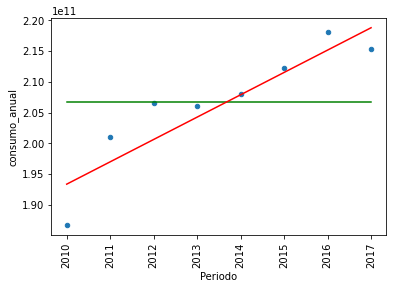

In [5]:
df = pd.read_csv("data/Usuariosyconsumodeelectricidadpormunicipio_clean.csv", dtype={
    'Cve_Edo': 'string',
    'Cve_Inegi': 'string',
    'Cve_Mun': 'string',
    'Estado': 'string',
    'Municipio': 'string',
    'Tarifa': 'string',
    'Periodo': 'int64',
    'Usuarios': 'int64',
    'Consumo': 'float64',
    'ISO': 'string'
})

df_by_consumo = df.loc[(df["Estado"] == "Nacional") & (df["Municipio"] != "Total Estatal") & (df["Tarifa"] == "TOTAL")]\
                .groupby("Periodo").aggregate(consumo_anual=pd.NamedAgg(column="Consumo", aggfunc=pd.DataFrame.mean))
# df_by_sal["sueldo_mensual"] = df_by_sal["sueldo_mensual"]**10
df_by_consumo.reset_index(inplace=True)
print_tabulate(df_by_consumo.head())
linear_regression(df_by_consumo, "Periodo", "consumo_anual")